In [1]:
%matplotlib notebook

from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

from matplotlib.patches import Circle
from matplotlib.cm import colors
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/home/varunk/.software/ml-stuff/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Load mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


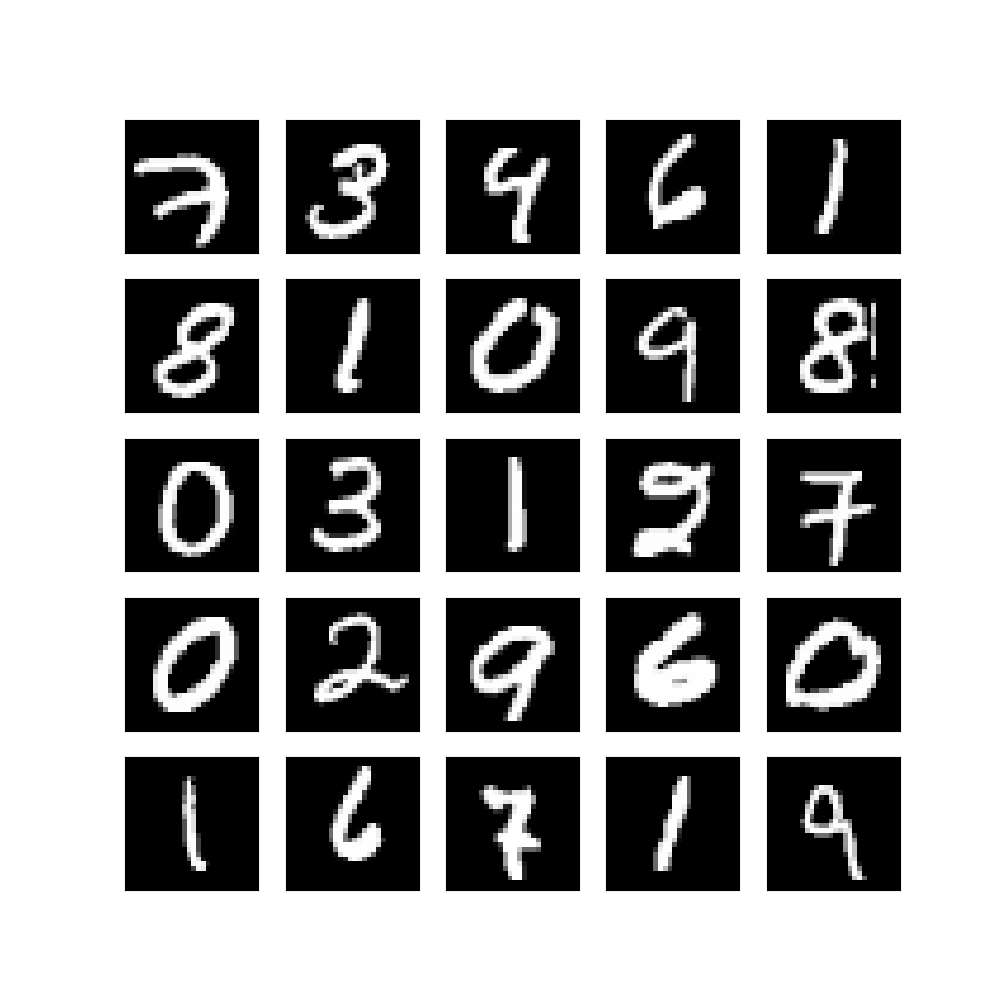

In [3]:
# Let us visualise what the data looks like. Although they are actually images 28x28 pixels
# we'll be using the data as vectors of length 784. So we'll need to reshape them to visualise

fig = plt.figure()
for i in range(25):
    i1 = i % 4
    i2 = i // 4
    ax = fig.add_subplot(5, 5, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(mnist.train.images[i].reshape(28, 28), cmap='Greys_r')

### Define a Neural Network

We'll use one hidden layer with relu non-linearities and 500 hidden units.

We'll use softmax on the output layer and use cross entropy as loss function

In [4]:
# Set up placeholders
x = tf.placeholder(tf.float32, shape=([None, 784]))
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Make the fully connected layer
W_1 = tf.Variable(tf.truncated_normal([784, 500], stddev=0.05))
b_1 = tf.Variable(tf.constant(0.1, shape=[500]))
h_1 = tf.nn.sigmoid(tf.matmul(x, W_1) + b_1)

# Make second fully connected layer
W_2 = tf.Variable(tf.zeros([500, 10]))
b_2 = tf.Variable(tf.zeros([10]))

# Predicted Class 
y = tf.matmul(h_1, W_2) + b_2

# Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1))
mistakes = tf.reduce_sum(tf.cast(correct_prediction, dtype=tf.int32))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [5]:
# Compute Error using Batches
def compute_error(session, x_data, y_data, max_batch_size=1000):
    N, d = session.run(tf.shape(x_data))
    mistake_count = 0
    start = 0
    flag = True
    while flag is True:
        if start + max_batch_size >= N:
            flag = False
        mistake_count += session.run(mistakes, 
                                  feed_dict={x: x_data[start:start + max_batch_size, :],
                                             y_: y_data[start:start + max_batch_size, :]})
        start = start + max_batch_size
    return mistake_count/N

In [6]:
# Set up the training procedure
train_step = tf.train.GradientDescentOptimizer(1.0).minimize(cross_entropy)

Let's now actually run the training procedure. Every 10 iterations we'll store the training and validation accuracy

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_accs = np.zeros(50)
valid_accs = np.zeros(50)
for i in range(500):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch[0], y_: batch[1]})
    if i % 10 == 0:
        print("Finished processing ", (i // 10) + 1, " batches.")
        train_accs[i//10] = sess.run(accuracy, feed_dict={x: mnist.train.images[:1000, :],
                                                          y_: mnist.train.labels[:1000, :]})
        valid_accs[i//10] = sess.run(accuracy, feed_dict={x: mnist.validation.images[:1000, :],
                                                          y_: mnist.validation.labels[:1000, :]})

Finished processing  1  batches.
Finished processing  2  batches.
Finished processing  3  batches.
Finished processing  4  batches.
Finished processing  5  batches.
Finished processing  6  batches.
Finished processing  7  batches.
Finished processing  8  batches.
Finished processing  9  batches.
Finished processing  10  batches.
Finished processing  11  batches.
Finished processing  12  batches.
Finished processing  13  batches.
Finished processing  14  batches.
Finished processing  15  batches.
Finished processing  16  batches.
Finished processing  17  batches.
Finished processing  18  batches.
Finished processing  19  batches.
Finished processing  20  batches.
Finished processing  21  batches.
Finished processing  22  batches.
Finished processing  23  batches.
Finished processing  24  batches.
Finished processing  25  batches.
Finished processing  26  batches.
Finished processing  27  batches.
Finished processing  28  batches.
Finished processing  29  batches.
Finished processing  30

<IPython.core.display.Javascript object>


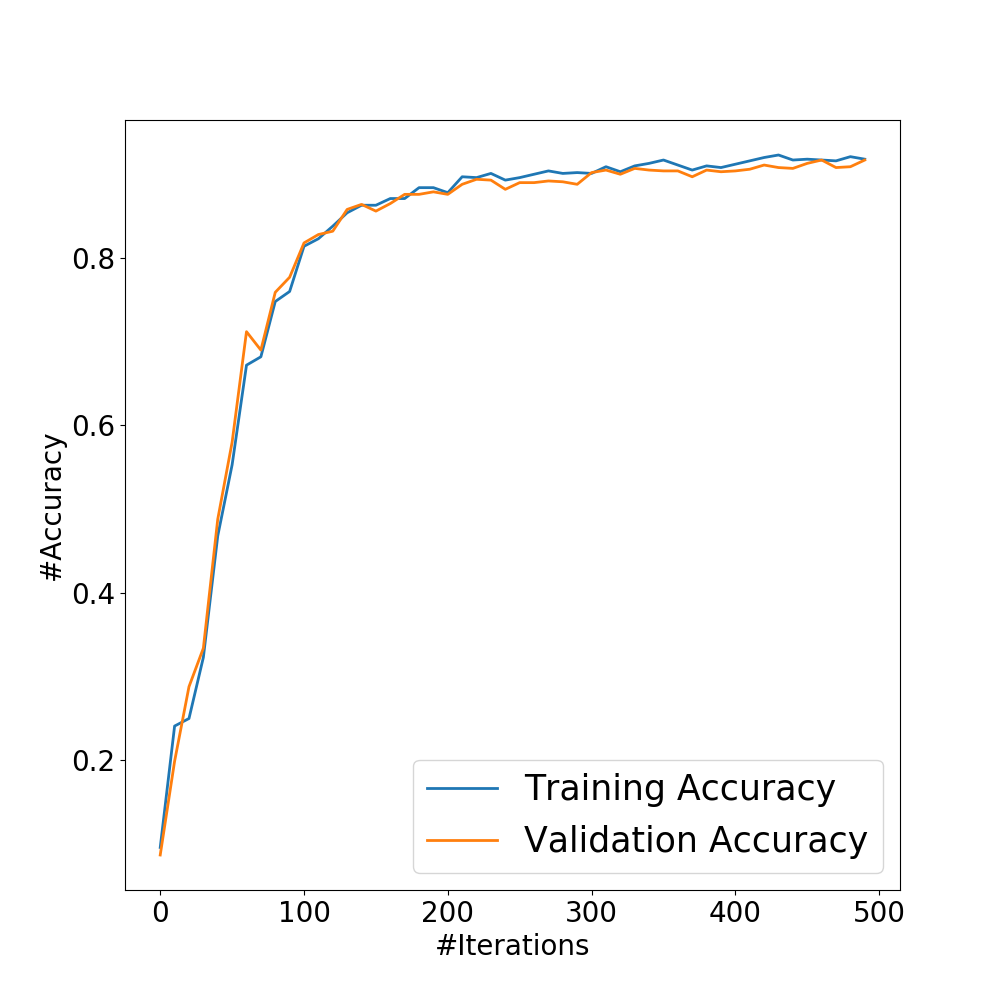

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('#Iterations', fontsize=20)
ax.set_ylabel('#Accuracy', fontsize=20)

iters = range(0, 500, 10)
ax.plot(iters, train_accs, lw=2, label='Training Accuracy')
ax.plot(iters, valid_accs, lw=2, label='Validation Accuracy')
ax.legend(loc='lower right', fontsize=25)

In [10]:
# Print the Test Accuracy
print('Test accuracy = %.2f' % (100.0 * sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Test accuracy = 92.39
